In [29]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

class Planet():
    a = 0.
    e = 0.
    i = 0.
    LongP = 0.
    LongA = 0.
    MeanA = 0.
    x1 = 0.
    x2 = 0.
    x3 = 0.
    v1 = 0.
    v2 = 0.
    v3 = 0.
    Time = []
    Mass = 0.

def ReadData(FileName):
    planet = Planet()
    planet.Time, _, planet.a, planet.e, planet.i, planet.LongP, planet.LongA, planet.MeanA = np.loadtxt(FileName, unpack=True)
    planet.a = planet.a#/1.49597870700e11
    return planet

def ReadHNBody(FileName):
    planet = Planet()
    planet.Time, planet.a, planet.e, planet.i, planet.LongP, planet.LongA, planet.MeanA, planet.x1, planet.x2, planet.x3, planet.v1, planet.v2, planet.v3 = np.loadtxt(FileName, skiprows=17, unpack=True)
    planet.a = planet.a
    return planet
    
#Mercury = ReadData('SpiNBody.Mercury.forward')
Venus = ReadData('SpiNBody.Venus.forward')
Earth = ReadData('SpiNBody.Earth.forward')
Mars = ReadData('SpiNBody.Mars.forward')

star = Planet()
Time, dt, star.a, star.e, star.i, star.LongP, star.LongA, star.MeanA, AngMom, OrbEnergy = np.loadtxt('SpiNBody.Star.forward', unpack=True)

#hnMercury = ReadHNBody('plan1.dat')
hnSun   = ReadHNBody('plan0.dat')
hnSun.Mass=333000
hnVenus = ReadHNBody('plan1.dat')
hnVenus.Mass = 0.815
hnEarth = ReadHNBody('plan2.dat')
hnEarth.Mass = 1.
hnMars = ReadHNBody('plan3.dat')
hnMars.Mass = 0.107

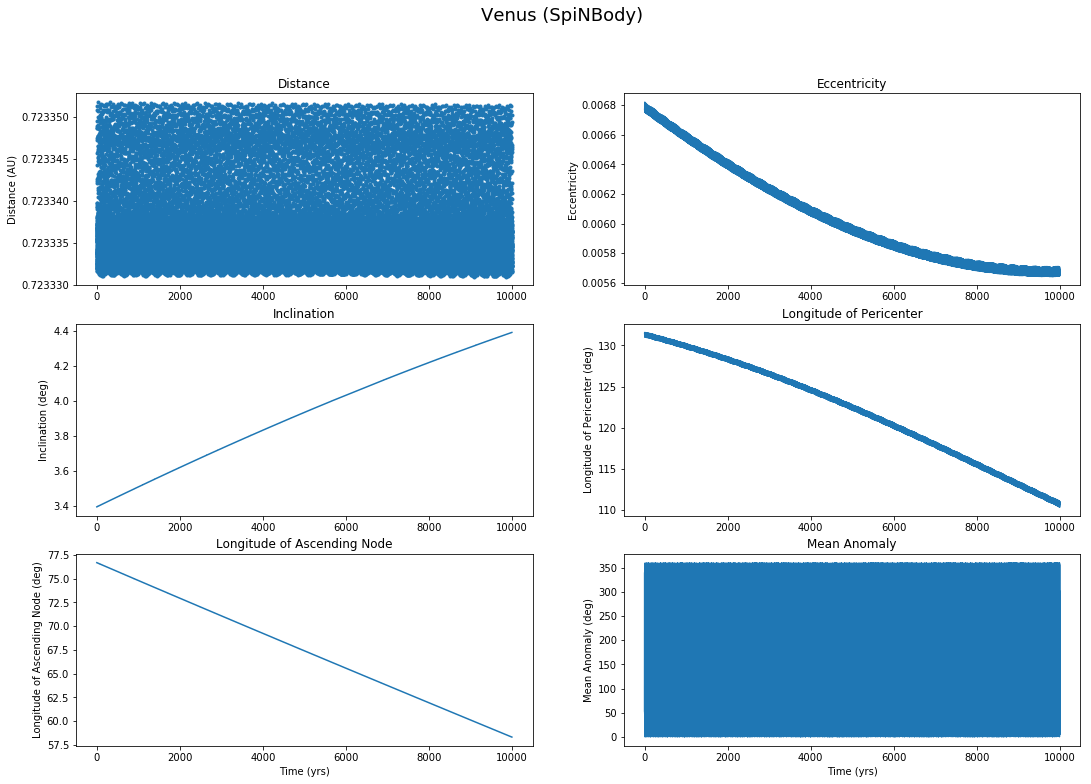

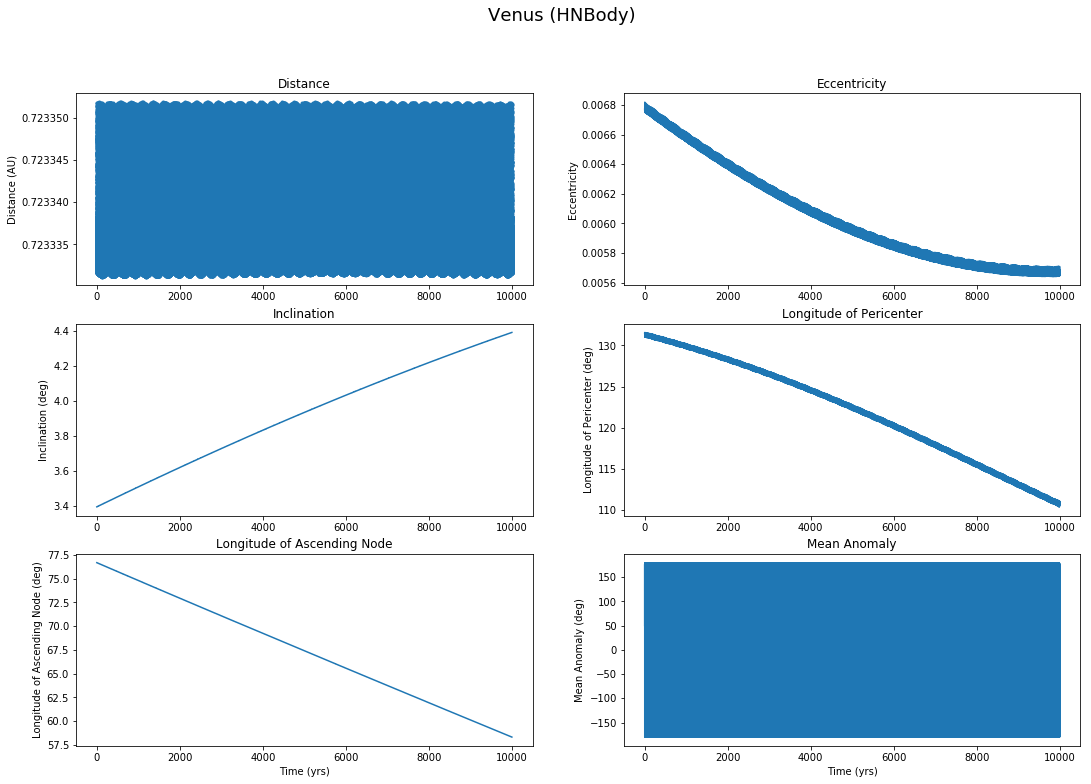

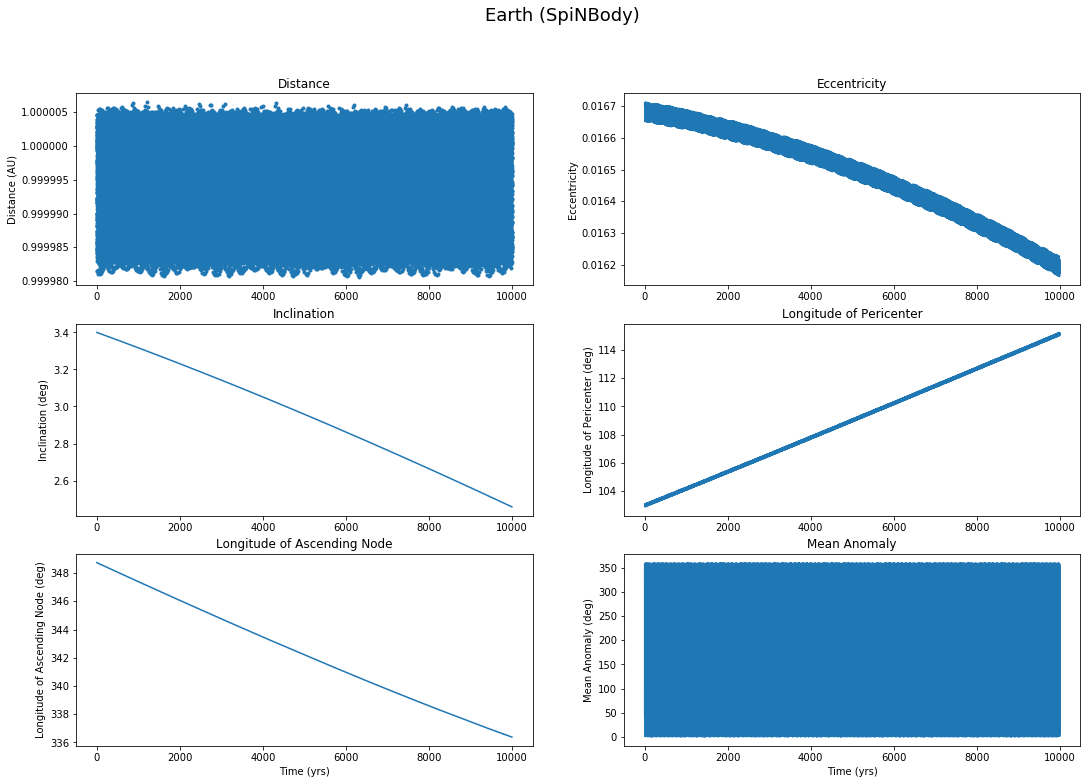

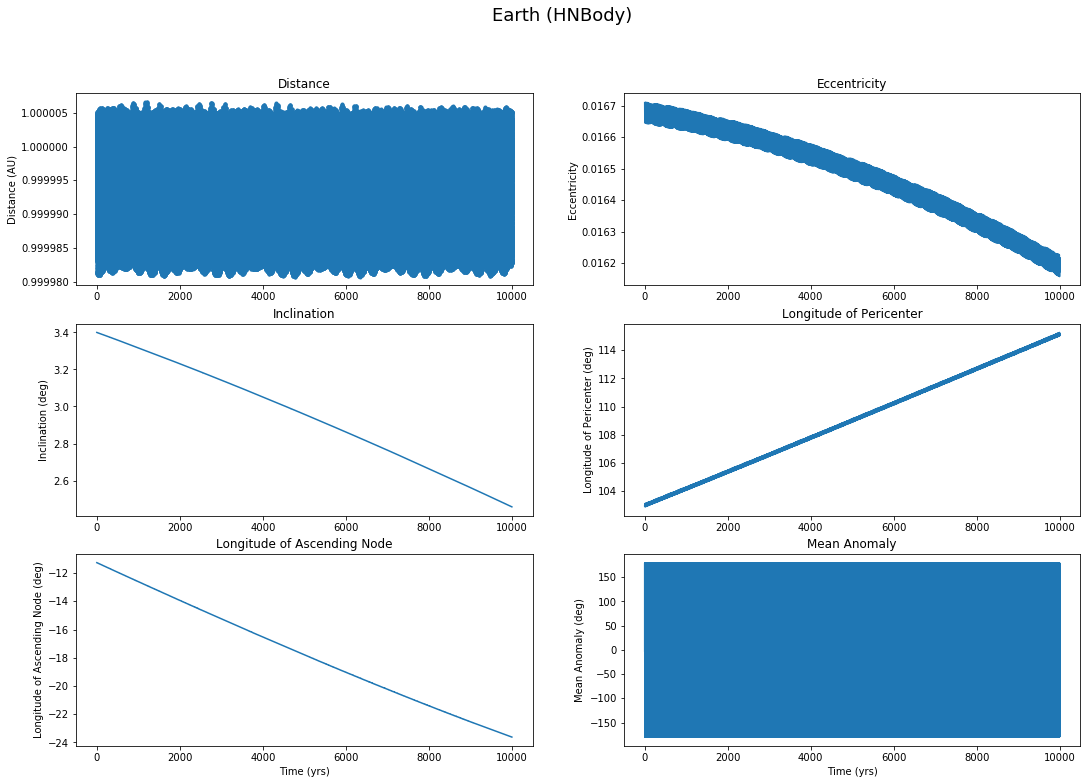

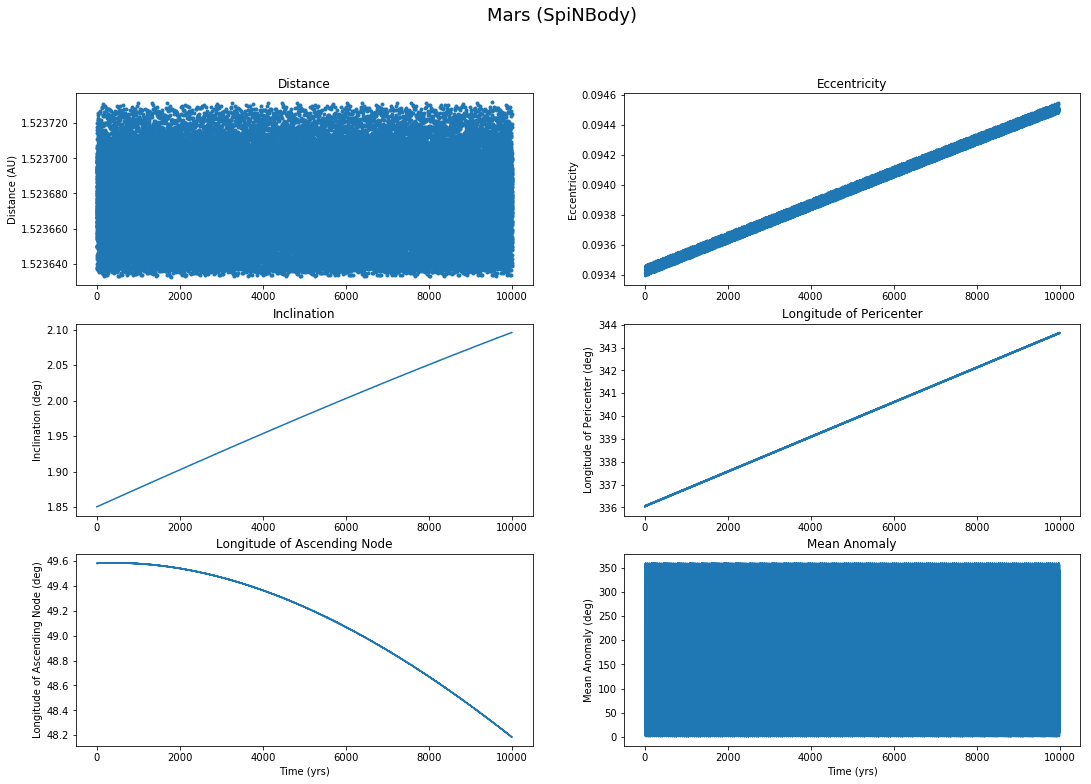

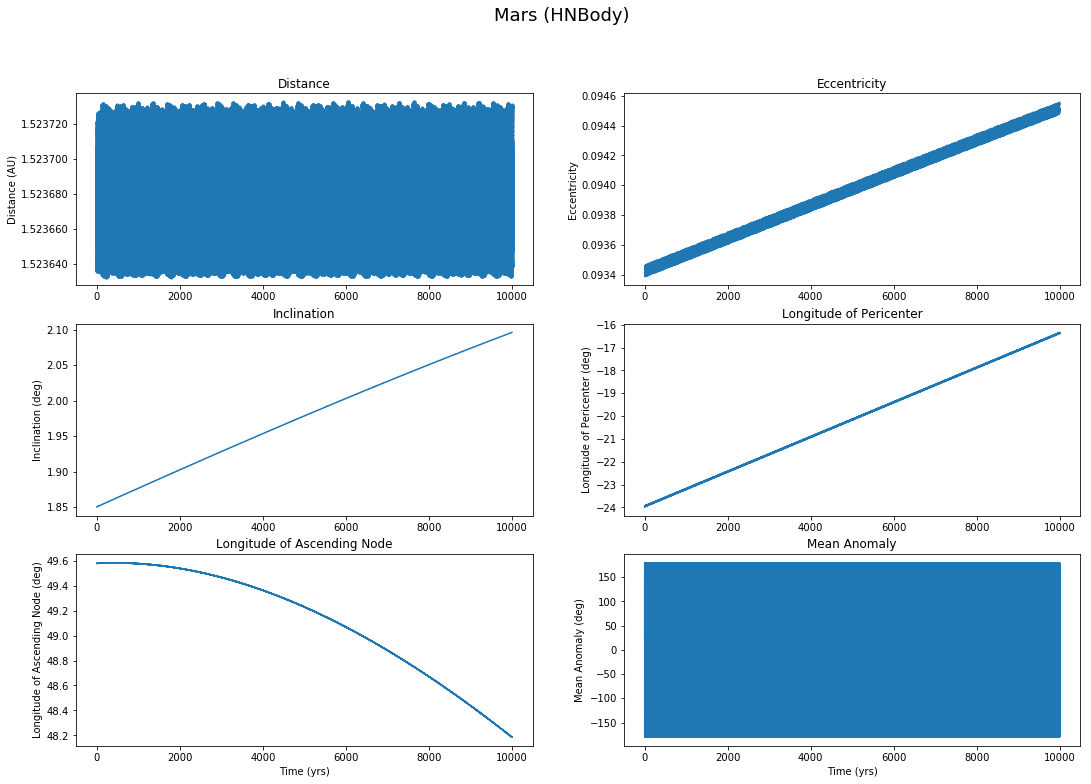

In [6]:
def PlotPlanet(planet,Name):
    fig,([ax1,ax2],[ax3,ax4],[ax5,ax6])=plt.subplots(3,2,figsize=[18,12])
    fig.suptitle(Name,fontsize=18)
    ax1.plot(planet.Time,planet.a,'.')
    #plt.xlabel('Time (yrs)')
    ax1.set_ylabel('Distance (AU)')
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    ax1.set_title('Distance')
    
    ax2.plot(planet.Time, planet.e)
    #plt.xlabel('Time (yrs)')
    ax2.set_ylabel('Eccentricity')
    ax2.set_title('Eccentricity')
    
    plt.subplot(3,2,3)
    plt.plot(planet.Time, planet.i)
    #plt.xlabel('Time (yrs)')
    plt.ylabel('Inclination (deg)')
    plt.title('Inclination')
    
    plt.subplot(3,2,4)
    plt.plot(planet.Time, planet.LongP)
    plt.ylabel('Longitude of Pericenter (deg)')
    plt.title('Longitude of Pericenter')
    
    plt.subplot(3,2,5)
    plt.plot(planet.Time, planet.LongA)
    plt.ylabel('Longitude of Ascending Node (deg)')
    plt.title('Longitude of Ascending Node')
    plt.xlabel('Time (yrs)')
    
    plt.subplot(3,2,6)
    plt.plot(planet.Time, planet.MeanA)
    plt.ylabel('Mean Anomaly (deg)')
    plt.xlabel('Time (yrs)')
    plt.title('Mean Anomaly')
    
    plt.savefig(Name+'_OrbElems.pdf')

#PlotPlanet(Mercury,'Mercury (SpiNBody)')
#PlotPlanet(hnMercury,'Mercury (HNBody)')

PlotPlanet(Venus,'Venus (SpiNBody)')
PlotPlanet(hnVenus,'Venus (HNBody)')

PlotPlanet(Earth,'Earth (SpiNBody)')
PlotPlanet(hnEarth,'Earth (HNBody)')

PlotPlanet(Mars,'Mars (SpiNBody)')
PlotPlanet(hnMars,'Mars (HNBody)')


[ 0.04101617  0.00155628 -0.04026412 ..., -0.01719574  0.04484324
  0.0441369 ]


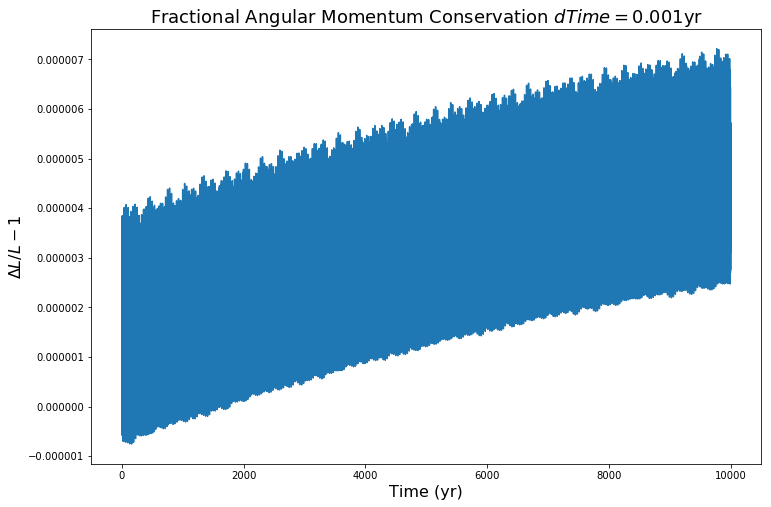

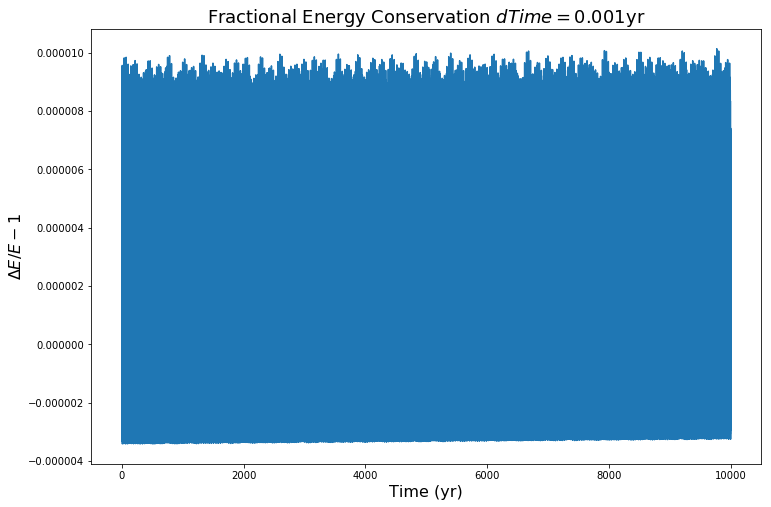

In [7]:
#Plot the fractional angular momentum over time

plt.figure(figsize=[12,8])
dEta=(AngMom/AngMom[0]-1)
plt.plot(Time,dEta)
plt.xlabel('Time (yr)', fontsize=16)
plt.ylabel(r'$\Delta L / L - 1$', fontsize=16)
plt.title(r'Fractional Angular Momentum Conservation $dTime = 0.001$yr (SpiNBody)', fontsize=18)
plt.savefig('dAngMom001.pdf')

#Now for energy
plt.figure(figsize=[12,8])
Energy = OrbEnergy
dEnergy = (Energy/Energy[0]-1)
plt.plot(Time,dEnergy)
plt.xlabel('Time (yr)', fontsize=16)
plt.ylabel(r'$\Delta E / E - 1$', fontsize=16)
plt.title(r'Fractional Energy Conservation $dTime = 0.001$yr (SpiNBody)', fontsize=18)
plt.savefig('dEnergy001.pdf')

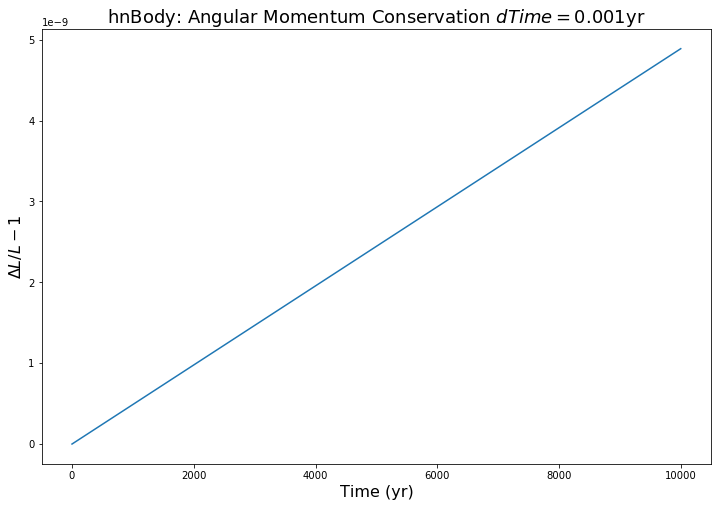

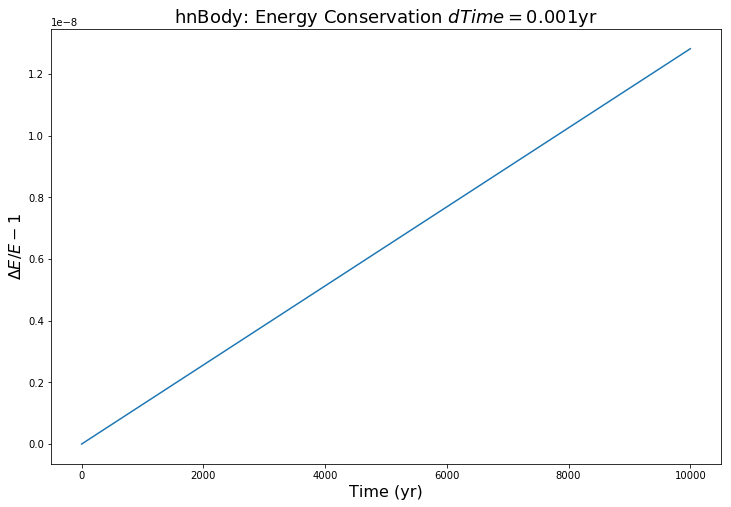

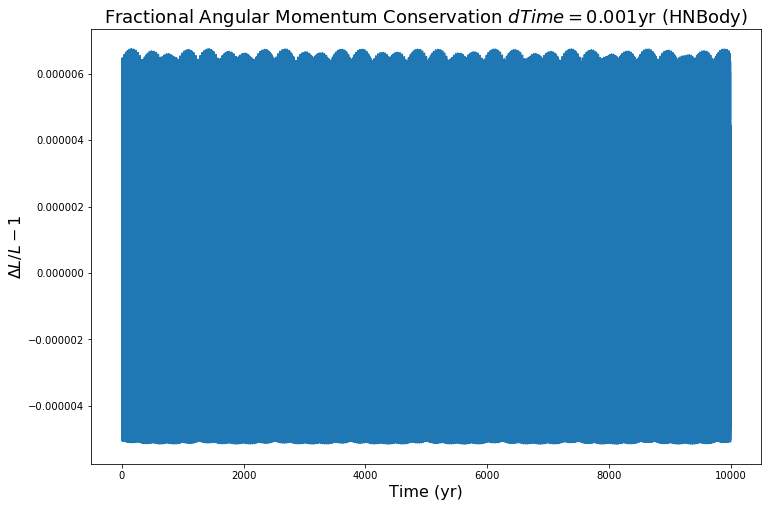

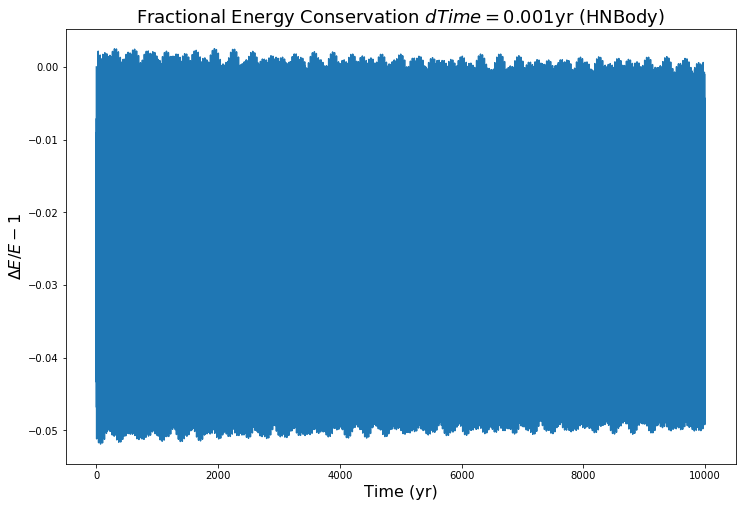

In [40]:
#hnbody plots
hnTime, hndE, dLx, dLy, dLz = np.loadtxt('energy.dat', skiprows=10, unpack=True)
hndL = np.sqrt(dLx**2+dLy**2+dLz**2)

plt.figure(figsize=[12,8])
plt.plot(hnTime,hndL)
plt.xlabel('Time (yr)', fontsize=16)
plt.ylabel(r'$\Delta L / L - 1$', fontsize=16)
plt.title(r'hnBody: Angular Momentum Conservation $dTime = 0.001$yr', fontsize=18)
plt.savefig('hndAngMom001.pdf')

plt.figure(figsize=[12,8])
plt.plot(hnTime,hndE)
plt.xlabel('Time (yr)', fontsize=16)
plt.ylabel(r'$\Delta E / E - 1$', fontsize=16)
plt.title(r'hnBody: Energy Conservation $dTime = 0.001$yr', fontsize=18)
plt.savefig('hndEnergy001.pdf')

def OrbAngMom(body):
    AngMom = np.zeros([3,np.size(body.x1)])
    
    AngMom[0,:] = body.Mass * (body.x2*body.v3 - body.x3*body.v2)
    AngMom[1,:] = -1*body.Mass * (body.x1*body.v3 - body.x3*body.v1)
    AngMom[2,:] = body.Mass * (body.x1*body.v2 - body.x2*body.v1)
    return(AngMom)

def TotOrbAngMom(star, planet1, planet2, planet3):
    TotAngMom = OrbAngMom(star)+OrbAngMom(planet1)+OrbAngMom(planet2)+OrbAngMom(planet3)
    return(np.sqrt(TotAngMom[0]**2+TotAngMom[1]**2+TotAngMom[2]**2))

def OrbEnergy(body):
    Energy = .5*body.Mass*(body.v1**2+body.v2**2+body.v3**2)
    return(Energy)

def TotEnergy(star, planet1, planet2, planet3):
    return(OrbEnergy(star)+OrbEnergy(planet1)+OrbEnergy(planet2)+OrbEnergy(planet3))

L = TotOrbAngMom(hnSun, hnVenus, hnEarth, hnMars)
dL = (L/L[0]-1)
plt.figure(figsize=[12,8])
plt.plot(hnSun.Time,dL)
plt.xlabel('Time (yr)', fontsize=16)
plt.ylabel(r'$\Delta L / L - 1$', fontsize=16)
plt.title(r'Fractional Angular Momentum Conservation $dTime = 0.001$yr (HNBody)', fontsize=18)
plt.savefig('HNdAngMom001.pdf')

E = TotEnergy(hnSun, hnVenus, hnEarth, hnMars)
dE = (E/E[0]-1)
plt.figure(figsize=[12,8])
plt.plot(hnSun.Time,dE)
plt.xlabel('Time (yr)', fontsize=16)
plt.ylabel(r'$\Delta E / E - 1$', fontsize=16)
plt.title(r'Fractional Energy Conservation $dTime = 0.001$yr (HNBody)', fontsize=18)
plt.savefig('hndEnergy001.pdf')

In [14]:
def FindTimeStep(X,Y,Z,Vx,Vy,Vz):
    Distance = np.sqrt(X**2+Y**2+Z**2)
    Velocity = np.sqrt(Vx**2+Vy**2+Vz**2)
    return(min(Distance/Velocity))

TimeEarth = FindTimeStep(X,Y,Z,Vx,Vy,Vz)
TimeSun   = FindTimeStep(sX,sY,sZ,sVx,sVy,sVz)
TimeMars  = FindTimeStep(mX,mY,mZ,mVx,mVy,mVz)
TimeMercury = FindTimeStep(merX,merY,merZ,merVx,merVy,merVz)
TimeVenus = FindTimeStep(vX,vY,vZ,vVx,vVy,vVz)
print(TimeEarth*0.05)
print(TimeSun*0.05)
print(TimeMars*0.05)
print(TimeMercury*0.05)
print(TimeVenus*0.05)

True